# Ejercicio 1

Se desean testear las siguientes hipótesis

- H0: $\mu = 5$
- H1: $\mu > 5$

utilizando una significancia de $\alpha = 0.05$. Dada una muestra aleatoria proveniente de una distribución normal con desviación estandar $\sigma = 1$, se rechazará H0 si $\overline{X} > 5 + z_\alpha \sigma / \sqrt{n}$. Tomamos una muestra de tamaño $n=10$

## **a)** Represente gráficamente la región crítica

Determinamos el $z_{critico} = z_c = z_\alpha = qnorm(1-\alpha)$ , que se obtendría de una tabla. Este valor, asi calculado es para una N(0,1), por lo que hay que modificarlo para los datos del problema, para encontrar la **región crítica**.

[1] 5.520148


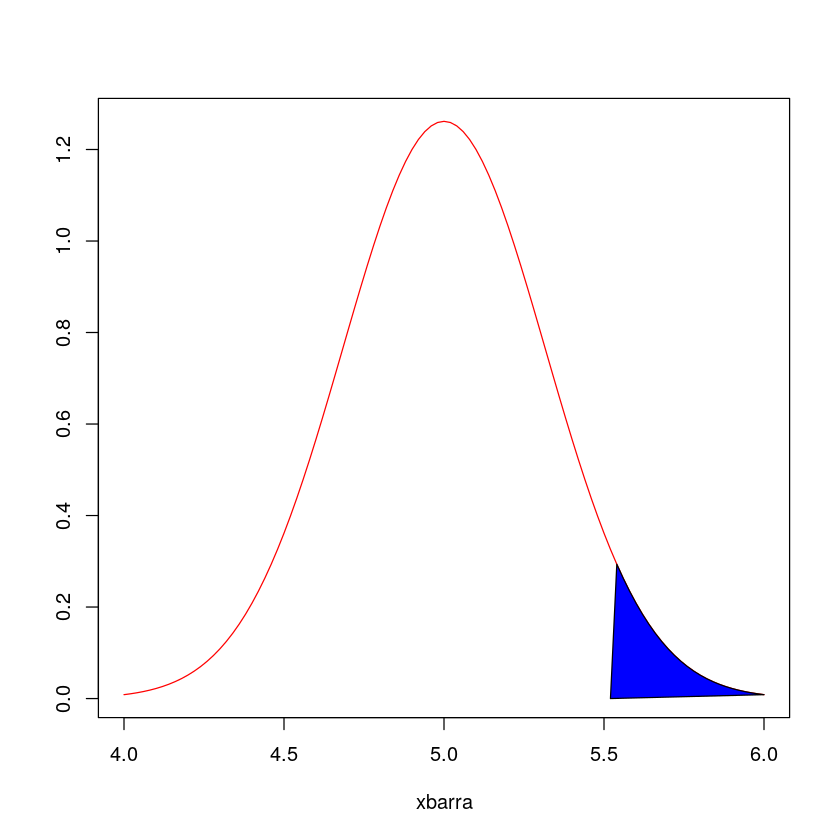

In [1]:
# datos 
mu0 = 5
alpha = 0.05
sigma = 1
n = 10
zc = qnorm(1-alpha) # es lo mismo que -qnorm(alpha)

region_critica = mu0 + zc*sigma/sqrt(n)
print(region_critica)
f = curve(dnorm(x, mu0, sigma/sqrt(n)), col = "red", xlim = c(4,6), xlab = 'xbarra', ylab = '')
polygon(c(region_critica, f$x[f$x >= region_critica]), c(0,f$y[f$x >=region_critica]), col = "blue")

## b) Probabilidad de error tipo II (acepto H0 cuando es falsa) para distintas medias

Vemos que al ir corriendo la curva a la derecha se reduce el error de tipo II

In [8]:
mu1 = 5.2
mu2 = 5.5
mu3 = 6

pnorm(region_critica, mean = mu3, sd = sigma/sqrt(n))

[1] 0.06457983

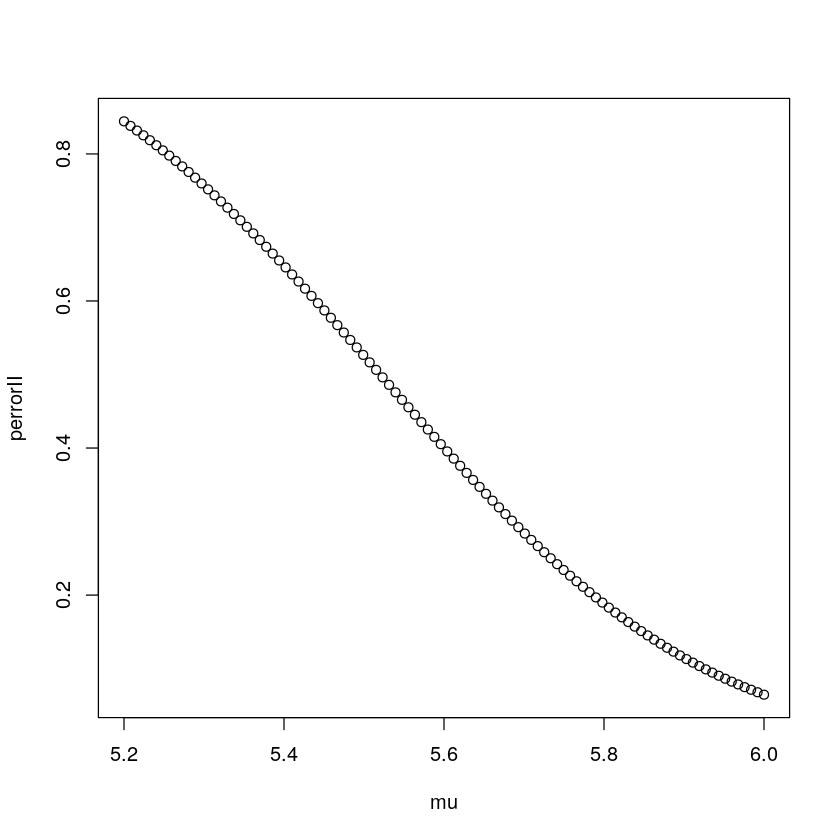

In [22]:
mu = seq(5.2, 6, length=100)
perrorII = numeric(100)

for (i in 1:100){
    perrorII[i] = pnorm(region_critica, mean = mu[i], sd = sigma/sqrt(n))
}
plot(mu, perrorII)

## c) Grafique la potencia para una muestra normal

Vemos como varia la potencia en función de un delta que se aleja de la $\mu_0 = 5$

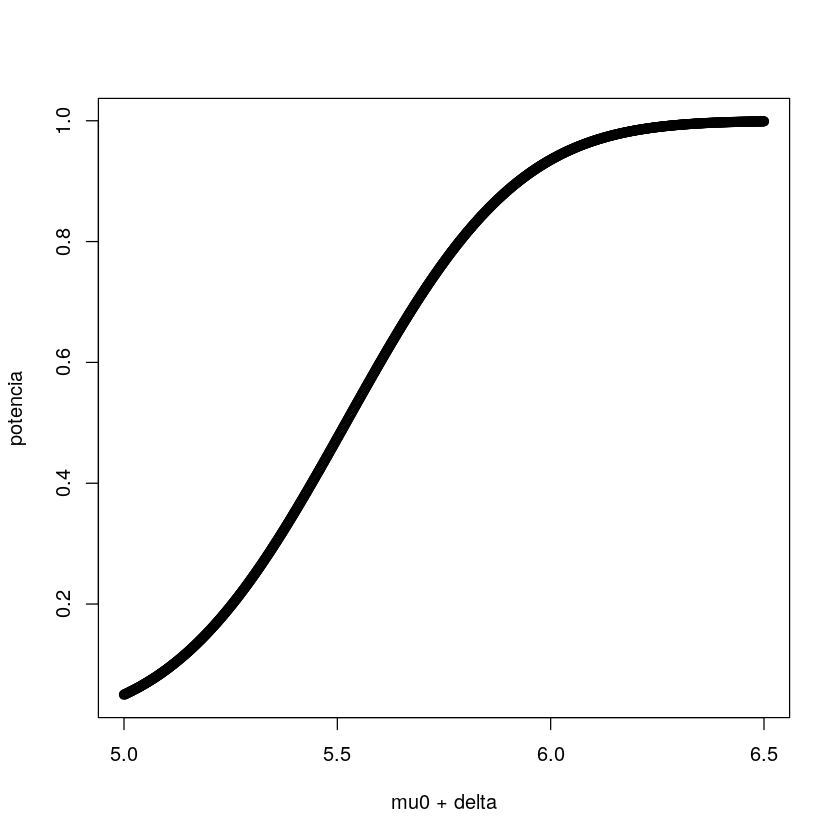

In [24]:
potencia = numeric(1000)
delta = seq(0, 1.5, length=1000)
for (j in 1:1000){
    potencia[j] = 1 - pnorm(region_critica, mean = mu0 + delta[j], sd = sigma/sqrt(n))
}
plot(delta, potencia)

## d) ¿Cuál es la menor diferencia que se lograría?

In [28]:
min(delta[which(potencia>0.9)])

[1] 0.9264264

## 4) Calcular para que n tenemos una potencia de 0.95

[1] "n minimo para una potencia de 95%:" "44"                                


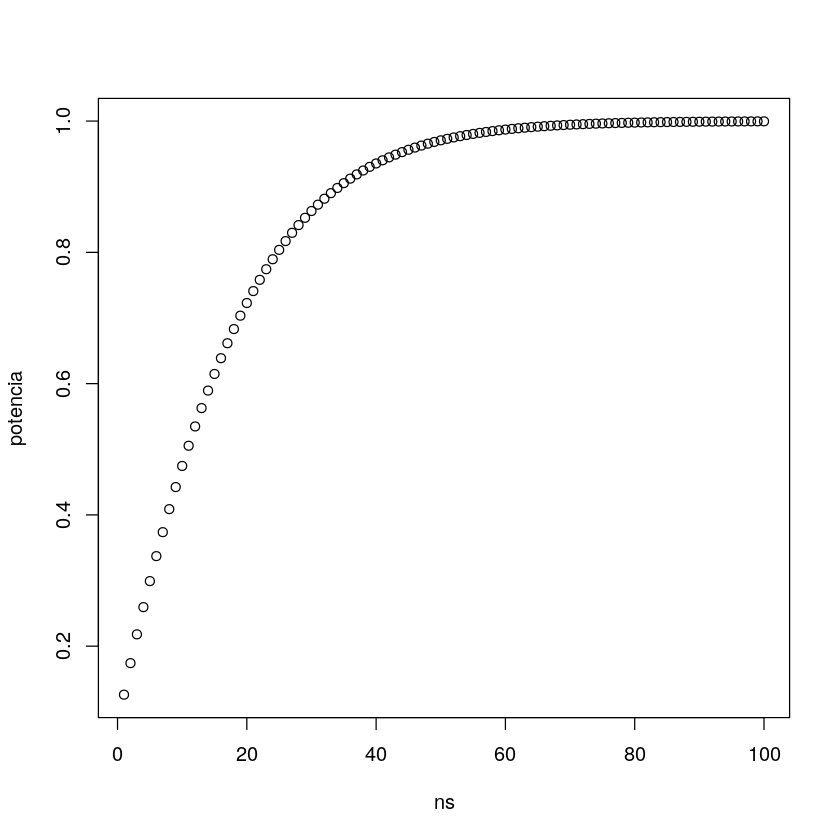

In [62]:
potencia = numeric(100)
ns = 1:100
zc = qnorm(1-alpha) # 

for (i in 1:100){
    punto_critico = 5 + zc*sigma/sqrt(ns[i])
    potencia[i] = 1 - pnorm(punto_critico, mean = 5.5, sd = sigma/sqrt(ns[i]))
}
plot(ns, potencia)
n_minimo_p95 = min(which(potencia>0.95))
print(c("n minimo para una potencia de 95%:", n_minimo_p95))

# Ejercicio 2

Acá veremos como calcular p-valores y vemos que a medida que nos alejamos de la media los pvalores son menores. La interpretación es que la H1 gana mas fuerza, es decir, se reduce la probabilidad de cometer un error de tipo I, esto es, rechazar H0 cuando es cierta.

A continuación calculamos 3 pvalores para medias de 2.2, 3 y 3.2.

In [68]:
n = 100
sigma = 1
mu0 = 2
pvalor = numeric(3)

# generar muestra mu0
muestra = rnorm(n, mean = mu0, sd = sigma)

# pvalor cuando mu1 = 2.2
xbarra = mean(muestra + 0.2)
pvalor[1] = 1 - pnorm(xbarra, mean=mu0, sd=sigma/sqrt(n)) # siempre para la mu0


# pvalor cuando mu2 = 3
xbarra = mean(muestra + 1)
pvalor[2] = 1 - pnorm(xbarra, mean=mu0, sd=sigma/sqrt(n))

# pvalor cuando mu2 = 3.2
xbarra = mean(muestra + 1.2)
pvalor[3] = 1 - pnorm(xbarra, mean=mu0, sd=sigma/sqrt(n))

print(pvalor)

[1] 0.00345139 0.00000000 0.00000000


Acá generalizamos para ir viendo su decrecimiento

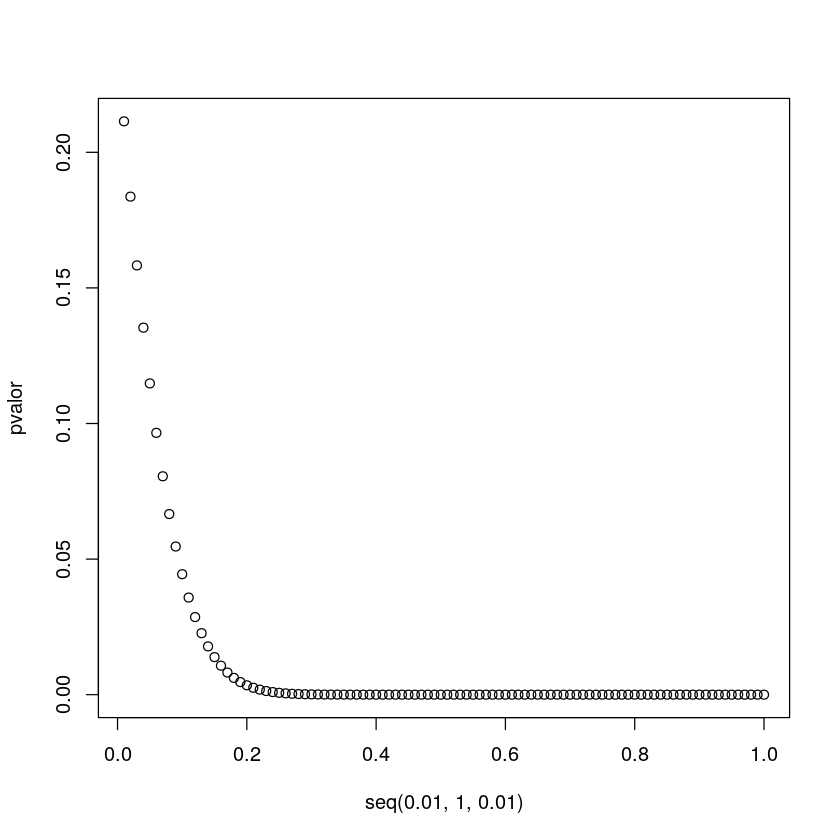

In [71]:
# Grafiquemos el pvalor
pvalor = numeric(100)
for (i in 1:100){
    xbarra = mean(muestra + i/100)
    pvalor[i] = 1 - pnorm(xbarra, mean=mu0, sd=sigma/sqrt(n))
}
plot(seq(0.01, 1, 0.01), pvalor)

# Ejercicio 3 

En un artı́culo del Journal of the American Medical Association de 1992 llamado “Una evaluación crı́tica de 98.6 grados Fahrenheit, el limite superior de la temperatura corporal normal y otros legados de Carl Reinhold August Wundrlich” se reportó la temperatura corporal, género y frecuencia cardı́aca para un número de personas. La temperatura para 25 mujeres arrojó una media de 98.3 ◦ F y un desvı́o de 0.48 ◦ F.

a) Se desea testear las hipótesis 

- H0 : μ = 98.6 
- H1 : μ <> 98.6. 

Defina para ello el estadı́stico adecuado y represente gráficamente la región de rechazo para este test.